In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
#Numpy can give Mean and Median
#Scipy can give Mode

In [3]:
# Read in the california housing data set
temperature_df = pd.read_csv('../Resources/California_Housing.csv')
temperature_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
...,...,...,...,...,...,...,...,...
2995,4.5724,4.0,6.837037,1.229630,352.0,2.607407,35.10,-117.98
2996,3.6031,52.0,3.702592,1.062756,1438.0,1.961801,37.77,-122.43
2997,5.2820,24.0,5.918495,1.000000,950.0,2.978056,32.85,-117.00
2998,1.3668,52.0,2.673635,1.089431,1515.0,1.759582,37.79,-122.41


The mean popoulation is 1387.9633333333334
The median population is 1152.5
The mode population is 1128.0


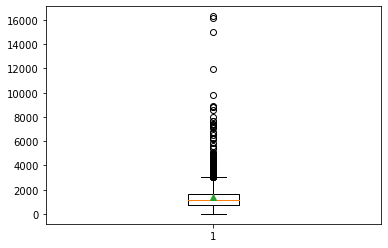

In [10]:
# Determine which measure of central tendency is most appropriate to describe the Population
population = temperature_df['Population']
mean_numpy = np.mean(population)
print(f"The mean popoulation is {mean_numpy}")

median_numpy = np.median(population)
print(f"The median population is {median_numpy}")

mode_scipy = sts.mode(population)[0][0]
print(f"The mode population is {mode_scipy}")

fig1, ax1 = plt.subplots()
ax1.boxplot(population, showmeans=True)
plt.show()

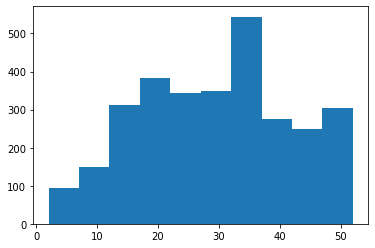

NormaltestResult(statistic=271.1900891393197, pvalue=1.2936606553611553e-59)


In [9]:
# Determine if the house age in California is considered normally distributed
houseAge = temperature_df['HouseAge']
plt.hist(houseAge)
plt.show()
print(sts.normaltest(houseAge))

#Does not appear so

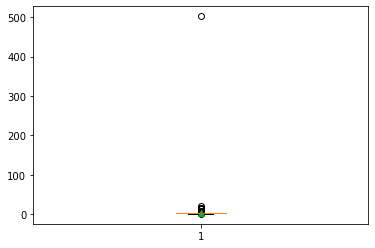

The lower quartile is: 2.4250909806040477
The upper quartile is: 3.2974592743428355
The interquartile range is: 0.8723682937387878
The median is: 2.81970199317512 
Values below 1.116538539995866 could be outliers.
Values above 4.606011714951017 could be outliers.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


In [24]:
# Determine if there are any potential outliers in the average occupancy in California
avgOcc = temperature_df['AveOccup']
fig1, ax1 = plt.subplots()
ax1.boxplot(avgOcc, showmeans=True)
plt.show()

quartiles = avgOcc.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

occupancy = temperature_df.loc[(temperature_df['AveOccup'] < lower_bound) | (temperature_df['AveOccup'] > upper_bound)]
occupancy
#Yes

In [27]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"{occupancy['MedInc'].max()}")
print(f"{occupancy['MedInc'].min()}")

15.0001
0.716


In [7]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.